
# Project: Investigate a Dataset - FBI Gun Data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

>The data comes from the FBI's
National Instant Criminal Background
Check System. The NICS is used by to
determine whether a prospective
buyer is eligible to buy firearms or
explosives. Gun shops call into this
system to ensure that each customer
does not have a criminal record or
isn’t otherwise ineligible to make a
purchase. The data has been
supplemented with state level data
from [census.gov](https://www.census.gov/).

> The [NICS](https://d17h27t6h515a5.cloudfront.net/topher/2017/November/5a0a4db8_gun-data/gun-data.xlsx) data is found in one
sheet of an .xlsx file. It contains
the number of firearm checks by
month, state, and type.

> The [U.S. census data]( https://d17h27t6h515a5.cloudfront.net/topher/2017/November/5a0a554c_u.s.-census-data/u.s.-census-data.csv) is found
in a .csv file. It contains several
variables at the state level. Most
variables just have one data
point per state (2016), but a few
have data for more than one
year.


### Questions for Analysis
>**Question 1**: What is the overall trend of gun purchases?

>**Question 2** : Which states performed the highest growth in gun purchase?

>**Question 3** : What correlation exists between Persons without health insurance, under age 65 years percent and Persons in poverty percent?

>**Question 4**: What correlation exists between Bachelor's degree or higher, percent of persons age 25 years+, 2011-2015 and Persons in poverty, percent?

>**Question 5**: What correlation exists between Veterans, 2011-2015 and totals gun purchase by state?

>**Question 6**: What correlation exists between Veteran-owned firms, 2012 and totals gun purchase by state?

>**Question 7**: What correlation exists between All firms, 2012 and totals gun purchase by state?

>**Question 8**: What correlation exists between Total employment, 2015 and totals gun purchase by state?


## Importation of python libraries

In [1]:
# Importation of python libraries

import numpy as np
import re
import pandas as pd
import seaborn as sb
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
sb.set_style('dark')

<a id='wrangling'></a>
## Data Wrangling

> In this section we will load in the data, check for cleanliness, and then trim and clean our dataset for analysis. 

### General Properties

In [2]:
# Load gun-data.csv into Pandas

gun_df=pd.read_csv("gun-data.csv")
gun_df.head()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,...,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019
1,2017-09,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5.0,...,0.0,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303
2,2017-09,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,13.0,...,0.0,0.0,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394
3,2017-09,Arkansas,2935.0,632.0,4347.0,6063.0,165.0,366,51.0,12.0,...,0.0,0.0,0.0,13.0,23.0,0.0,0.0,2.0,1.0,17747
4,2017-09,California,57839.0,0.0,37165.0,24581.0,2984.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123506


In [3]:
# Print dataframe information
gun_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   month                      12485 non-null  object 
 1   state                      12485 non-null  object 
 2   permit                     12461 non-null  float64
 3   permit_recheck             1100 non-null   float64
 4   handgun                    12465 non-null  float64
 5   long_gun                   12466 non-null  float64
 6   other                      5500 non-null   float64
 7   multiple                   12485 non-null  int64  
 8   admin                      12462 non-null  float64
 9   prepawn_handgun            10542 non-null  float64
 10  prepawn_long_gun           10540 non-null  float64
 11  prepawn_other              5115 non-null   float64
 12  redemption_handgun         10545 non-null  float64
 13  redemption_long_gun        10544 non-null  flo

In [4]:
# Load census-data.csv into Pandas

census_df=pd.read_csv("u.s.-census-data.csv")
census_df.head()

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)",NaN,"4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population estimates base, April 1, 2010, (V2...",NaN,"4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936",...,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"
2,"Population, percent change - April 1, 2010 (es...",NaN,1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,...,6.3,4.8,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%
3,"Population, Census, April 1, 2010",NaN,"4,779,736","710,231","6,392,017","2,915,918","37,253,956","5,029,196","3,574,097","897,934",...,814180,6346105,"25,145,561","2,763,885","625,741","8,001,024","6,724,540","1,852,994","5,686,986","563,626"
4,"Persons under 5 years, percent, July 1, 2016, ...",NaN,6.00%,7.30%,6.30%,6.40%,6.30%,6.10%,5.20%,5.80%,...,7.1,6.1,7.20%,8.30%,4.90%,6.10%,6.20%,5.50%,5.80%,6.50%


In [5]:
# Print dataframe information
census_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 52 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Fact            65 non-null     object
 1   Fact Note       16 non-null     object
 2   Alabama         65 non-null     object
 3   Alaska          65 non-null     object
 4   Arizona         65 non-null     object
 5   Arkansas        65 non-null     object
 6   California      65 non-null     object
 7   Colorado        65 non-null     object
 8   Connecticut     65 non-null     object
 9   Delaware        65 non-null     object
 10  Florida         65 non-null     object
 11  Georgia         65 non-null     object
 12  Hawaii          65 non-null     object
 13  Idaho           65 non-null     object
 14  Illinois        65 non-null     object
 15  Indiana         65 non-null     object
 16  Iowa            65 non-null     object
 17  Kansas          65 non-null     object
 18  Kentucky    


### Data Cleaning
> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).
 

### gun_df  data cleaning

> In this proccess, the following steps will be followed:
>> Replace all the NaN values in gun_df with the mean value 

>> Put month column in datetime format in a new column named month_year

>> Extract month from month_year column

>> Extract year from month_year column

>> Iteration over range of columns 2 to 6 and change the type float64 to int64

>> Put month column and year column to string format

>> Group gun_df dataframe by month, year and state

>> Move year column to position 1


In [6]:
def fillnan(df):
    """ This function gets the mean value of the dataframe given in argument and replace all the NaN values in gun_df with the mean value """

# Gets the mean value of the given dataframe df
    mean=df.mean()
# Replace all the NaN values in df with the mean value 
    df.fillna(mean, inplace=True)
    return df
    df

fillnan(gun_df)

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09,Alabama,16717.0,0.000000,5734.0,6320.0,221.000000,317,0.0,15.000000,...,0.000000,0.000000,0.000000,9.000,16.000000,3.000000,0.00000,0.000000,3.000000,32019
1,2017-09,Alaska,209.0,2.000000,2320.0,2930.0,219.000000,160,0.0,5.000000,...,0.000000,0.000000,0.000000,17.000,24.000000,1.000000,0.00000,0.000000,0.000000,6303
2,2017-09,Arizona,5069.0,382.000000,11063.0,7946.0,920.000000,631,0.0,13.000000,...,0.000000,0.000000,0.000000,38.000,12.000000,2.000000,0.00000,0.000000,0.000000,28394
3,2017-09,Arkansas,2935.0,632.000000,4347.0,6063.0,165.000000,366,51.0,12.000000,...,0.000000,0.000000,0.000000,13.000,23.000000,0.000000,0.00000,2.000000,1.000000,17747
4,2017-09,California,57839.0,0.000000,37165.0,24581.0,2984.000000,0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.00000,0.000000,0.000000,123506
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12480,1998-11,Virginia,0.0,1165.956364,14.0,2.0,360.471636,8,0.0,4.828021,...,1.027548,0.076768,0.087273,14.936,11.602909,1.030182,0.40202,0.441818,0.105987,24
12481,1998-11,Washington,1.0,1165.956364,65.0,286.0,360.471636,8,1.0,4.828021,...,1.027548,0.076768,0.087273,14.936,11.602909,1.030182,0.40202,0.441818,0.105987,361
12482,1998-11,West Virginia,3.0,1165.956364,149.0,251.0,360.471636,5,0.0,4.828021,...,1.027548,0.076768,0.087273,14.936,11.602909,1.030182,0.40202,0.441818,0.105987,408
12483,1998-11,Wisconsin,0.0,1165.956364,25.0,214.0,360.471636,2,0.0,4.828021,...,1.027548,0.076768,0.087273,14.936,11.602909,1.030182,0.40202,0.441818,0.105987,241


###### All NaN values in gun_df has been replaced by the mean value 

In [7]:
# Put month column in datetime format in a new column named month_year
gun_df['month_year']=pd.to_datetime(gun_df['month'], format='%Y-%m')

# Extract month from month_year column
gun_df['month']=gun_df['month_year'].dt.month

# Extract year from month_year column
gun_df=gun_df.assign(year=gun_df['month_year'].dt.year)

###### Have put month column in datetime format in a new column named month_year and extracted month and year from month_year column

In [8]:
# Iteration over range of columns 2 to 6 and change the type float64 to int64

gun_df_cols=gun_df.columns
cols=[]

def foat_to_int(df, x, y):
    """This function takes three arguments: a dataframe df, the lower index x of a list, and the upper index y of the list.
    The function convert the type of the dataframe columns refered in the list to int64 """
    
    for i in range(x,y) :
        if df[i]:
            cols.append(df[i])
    for col in cols:
        gun_df[col]=gun_df[col].astype({col:"int64"})


        
foat_to_int(gun_df_cols, 2, 7)
foat_to_int(gun_df_cols, 8, 26)


        
gun_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 29 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   month                      12485 non-null  int64         
 1   state                      12485 non-null  object        
 2   permit                     12485 non-null  int64         
 3   permit_recheck             12485 non-null  int64         
 4   handgun                    12485 non-null  int64         
 5   long_gun                   12485 non-null  int64         
 6   other                      12485 non-null  int64         
 7   multiple                   12485 non-null  int64         
 8   admin                      12485 non-null  int64         
 9   prepawn_handgun            12485 non-null  int64         
 10  prepawn_long_gun           12485 non-null  int64         
 11  prepawn_other              12485 non-null  int64         
 12  rede

###### We have iterated over range of columns 2 to 6 and changed the type float64 to int64

In [9]:
# Put month column and year column to string format

gun_df=gun_df.astype({"month":"str", "year":"str"})
gun_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 29 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   month                      12485 non-null  object        
 1   state                      12485 non-null  object        
 2   permit                     12485 non-null  int64         
 3   permit_recheck             12485 non-null  int64         
 4   handgun                    12485 non-null  int64         
 5   long_gun                   12485 non-null  int64         
 6   other                      12485 non-null  int64         
 7   multiple                   12485 non-null  int64         
 8   admin                      12485 non-null  int64         
 9   prepawn_handgun            12485 non-null  int64         
 10  prepawn_long_gun           12485 non-null  int64         
 11  prepawn_other              12485 non-null  int64         
 12  rede

###### We have changed month column and year column to string format

In [10]:
# gun_df dataframe group by month, year and state

gun_df.groupby(['month','year','state'])
gun_df.head()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals,month_year,year
0,9,Alabama,16717,0,5734,6320,221,317,0,15,...,0,9,16,3,0,0,3,32019,2017-09-01,2017
1,9,Alaska,209,2,2320,2930,219,160,0,5,...,0,17,24,1,0,0,0,6303,2017-09-01,2017
2,9,Arizona,5069,382,11063,7946,920,631,0,13,...,0,38,12,2,0,0,0,28394,2017-09-01,2017
3,9,Arkansas,2935,632,4347,6063,165,366,51,12,...,0,13,23,0,0,2,1,17747,2017-09-01,2017
4,9,California,57839,0,37165,24581,2984,0,0,0,...,0,0,0,0,0,0,0,123506,2017-09-01,2017


###### We have grouped gun_df by month, year and state

In [11]:
# Move year column to position 1

gun_df_cols=list(gun_df.columns)
gun_df_cols.remove('year')
gun_df_cols.insert(1,'year')
gun_df=gun_df[gun_df_cols]
gun_df.head()

,month,year,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,...,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals,month_year
0,9,2017,Alabama,16717,0,5734,6320,221,317,0,...,0,0,9,16,3,0,0,3,32019,2017-09-01
1,9,2017,Alaska,209,2,2320,2930,219,160,0,...,0,0,17,24,1,0,0,0,6303,2017-09-01
2,9,2017,Arizona,5069,382,11063,7946,920,631,0,...,0,0,38,12,2,0,0,0,28394,2017-09-01
3,9,2017,Arkansas,2935,632,4347,6063,165,366,51,...,0,0,13,23,0,0,2,1,17747,2017-09-01
4,9,2017,California,57839,0,37165,24581,2984,0,0,...,0,0,0,0,0,0,0,0,123506,2017-09-01


###### year column has been moved to position 1

### census_df data cleaning

> In this proccess, the following steps will be followed:
>>Remove 'Fact Note' column. This column is quite useless.

>>Create a list of columns names state and Fact elements

>>Transpose census_df

>>Replace census_df columns by fact_list 

>> Clean census_df rows from all $ or , or % or "

>> Clean census_df rows from all upper case letter except for state column

>>Replace all the NaN values with the mean of census_df 



In [12]:
# Remove 'Fact Note' column. This column is quite useless.

del census_df['Fact Note']
census_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 51 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Fact            65 non-null     object
 1   Alabama         65 non-null     object
 2   Alaska          65 non-null     object
 3   Arizona         65 non-null     object
 4   Arkansas        65 non-null     object
 5   California      65 non-null     object
 6   Colorado        65 non-null     object
 7   Connecticut     65 non-null     object
 8   Delaware        65 non-null     object
 9   Florida         65 non-null     object
 10  Georgia         65 non-null     object
 11  Hawaii          65 non-null     object
 12  Idaho           65 non-null     object
 13  Illinois        65 non-null     object
 14  Indiana         65 non-null     object
 15  Iowa            65 non-null     object
 16  Kansas          65 non-null     object
 17  Kentucky        65 non-null     object
 18  Louisiana   

###### 'Fact Note' column deleted

In [13]:
# Create a list of columns state and Fact elements 

fact_list=list(census_df['Fact'])
fact_list.insert(0, 'state')
fact_list

['state',
 'Population estimates, July 1, 2016,  (V2016)',
 'Population estimates base, April 1, 2010,  (V2016)',
 'Population, percent change - April 1, 2010 (estimates base) to July 1, 2016,  (V2016)',
 'Population, Census, April 1, 2010',
 'Persons under 5 years, percent, July 1, 2016,  (V2016)',
 'Persons under 5 years, percent, April 1, 2010',
 'Persons under 18 years, percent, July 1, 2016,  (V2016)',
 'Persons under 18 years, percent, April 1, 2010',
 'Persons 65 years and over, percent,  July 1, 2016,  (V2016)',
 'Persons 65 years and over, percent, April 1, 2010',
 'Female persons, percent,  July 1, 2016,  (V2016)',
 'Female persons, percent, April 1, 2010',
 'White alone, percent, July 1, 2016,  (V2016)',
 'Black or African American alone, percent, July 1, 2016,  (V2016)',
 'American Indian and Alaska Native alone, percent, July 1, 2016,  (V2016)',
 'Asian alone, percent, July 1, 2016,  (V2016)',
 'Native Hawaiian and Other Pacific Islander alone, percent, July 1, 2016,  (V20

###### We have created a list of columns state and Fact elements named fact_list

In [14]:
# Transpose census_df  
census_df=census_df.iloc[0:65, 1:52].T
census_df.reset_index(inplace=True)

###### census_df transposed

In [15]:
# Replace census_df columns by fact_list 
census_df.columns=fact_list
census_df.head()

,state,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2016)","Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, (V2016)","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016, (V2016)","Persons under 18 years, percent, April 1, 2010","Persons 65 years and over, percent, July 1, 2016, (V2016)",...,"All firms, 2012","Men-owned firms, 2012","Women-owned firms, 2012","Minority-owned firms, 2012","Nonminority-owned firms, 2012","Veteran-owned firms, 2012","Nonveteran-owned firms, 2012","Population per square mile, 2010","Land area in square miles, 2010",FIPS Code
0,Alabama,"4,863,300","4,780,131",1.70%,"4,779,736",6.00%,6.40%,22.60%,23.70%,16.10%,...,"374,153","203,604","137,630","92,219","272,651","41,943","316,984",94.4,"50,645.33","""01"""
1,Alaska,"741,894","710,249",4.50%,"710,231",7.30%,7.60%,25.20%,26.40%,10.40%,...,"68,032","35,402","22,141","13,688","51,147","7,953","56,091",1.2,"570,640.95","""02"""
2,Arizona,"6,931,071","6,392,301",8.40%,"6,392,017",6.30%,7.10%,23.50%,25.50%,16.90%,...,"499,926","245,243","182,425","135,313","344,981","46,780","427,582",56.3,"113,594.08","""04"""
3,Arkansas,"2,988,248","2,916,025",2.50%,"2,915,918",6.40%,6.80%,23.60%,24.40%,16.30%,...,"231,959","123,158","75,962","35,982","189,029","25,915","192,988",56,"52,035.48","""05"""
4,California,"39,250,017","37,254,522",5.40%,"37,253,956",6.30%,6.80%,23.20%,25.00%,13.60%,...,"3,548,449","1,852,580","1,320,085","1,619,857","1,819,107","252,377","3,176,341",239.1,"155,779.22","""06"""


###### census_df columns replaced by fact_list 

In [16]:
# Clean census_df rows from all $ or , or % or "

census_df=census_df.applymap(lambda x: re.sub('[$,"%]',"", x))
census_df.head()

,state,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2016)","Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, (V2016)","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016, (V2016)","Persons under 18 years, percent, April 1, 2010","Persons 65 years and over, percent, July 1, 2016, (V2016)",...,"All firms, 2012","Men-owned firms, 2012","Women-owned firms, 2012","Minority-owned firms, 2012","Nonminority-owned firms, 2012","Veteran-owned firms, 2012","Nonveteran-owned firms, 2012","Population per square mile, 2010","Land area in square miles, 2010",FIPS Code
0,Alabama,4863300,4780131,1.70,4779736,6.00,6.40,22.60,23.70,16.10,...,374153,203604,137630,92219,272651,41943,316984,94.4,50645.33,01
1,Alaska,741894,710249,4.50,710231,7.30,7.60,25.20,26.40,10.40,...,68032,35402,22141,13688,51147,7953,56091,1.2,570640.95,02
2,Arizona,6931071,6392301,8.40,6392017,6.30,7.10,23.50,25.50,16.90,...,499926,245243,182425,135313,344981,46780,427582,56.3,113594.08,04
3,Arkansas,2988248,2916025,2.50,2915918,6.40,6.80,23.60,24.40,16.30,...,231959,123158,75962,35982,189029,25915,192988,56,52035.48,05
4,California,39250017,37254522,5.40,37253956,6.30,6.80,23.20,25.00,13.60,...,3548449,1852580,1320085,1619857,1819107,252377,3176341,239.1,155779.22,06


###### We have cleaned census_df rows from all $ or , or % or " symbol

In [17]:
# Clean census_df rows from all upper case letter except for state column

cols=list(census_df.columns)
for i in range(1,65):
    col=cols[i]
    census_df[col].replace(regex=r'[A-Z]', value=np.nan, inplace=True)
    census_df=census_df.astype({col:"float64"})
    
census_df.head()

,state,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2016)","Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, (V2016)","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016, (V2016)","Persons under 18 years, percent, April 1, 2010","Persons 65 years and over, percent, July 1, 2016, (V2016)",...,"All firms, 2012","Men-owned firms, 2012","Women-owned firms, 2012","Minority-owned firms, 2012","Nonminority-owned firms, 2012","Veteran-owned firms, 2012","Nonveteran-owned firms, 2012","Population per square mile, 2010","Land area in square miles, 2010",FIPS Code
0,Alabama,4863300.0,4780131.0,1.7,4779736.0,6.0,6.4,22.6,23.7,16.1,...,374153.0,203604.0,137630.0,92219.0,272651.0,41943.0,316984.0,94.4,50645.33,01
1,Alaska,741894.0,710249.0,4.5,710231.0,7.3,7.6,25.2,26.4,10.4,...,68032.0,35402.0,22141.0,13688.0,51147.0,7953.0,56091.0,1.2,570640.95,02
2,Arizona,6931071.0,6392301.0,8.4,6392017.0,6.3,7.1,23.5,25.5,16.9,...,499926.0,245243.0,182425.0,135313.0,344981.0,46780.0,427582.0,56.3,113594.08,04
3,Arkansas,2988248.0,2916025.0,2.5,2915918.0,6.4,6.8,23.6,24.4,16.3,...,231959.0,123158.0,75962.0,35982.0,189029.0,25915.0,192988.0,56.0,52035.48,05
4,California,39250017.0,37254522.0,5.4,37253956.0,6.3,6.8,23.2,25.0,13.6,...,3548449.0,1852580.0,1320085.0,1619857.0,1819107.0,252377.0,3176341.0,239.1,155779.22,06


###### We have cleaned census_df rows from all upper case letter except for state column

In [18]:
# Show information 
census_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 66 columns):
 #   Column                                                                                  Non-Null Count  Dtype  
---  ------                                                                                  --------------  -----  
 0   state                                                                                   50 non-null     object 
 1   Population estimates, July 1, 2016,  (V2016)                                            50 non-null     float64
 2   Population estimates base, April 1, 2010,  (V2016)                                      50 non-null     float64
 3   Population, percent change - April 1, 2010 (estimates base) to July 1, 2016,  (V2016)   50 non-null     float64
 4   Population, Census, April 1, 2010                                                       50 non-null     float64
 5   Persons under 5 years, percent, July 1, 2016,  (V2016)                   

In [19]:
# Get the mean value of the census_df dataframe
# Replace all the NaN values with the mean of census_df 
fillnan(census_df)

,state,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2016)","Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, (V2016)","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016, (V2016)","Persons under 18 years, percent, April 1, 2010","Persons 65 years and over, percent, July 1, 2016, (V2016)",...,"All firms, 2012","Men-owned firms, 2012","Women-owned firms, 2012","Minority-owned firms, 2012","Nonminority-owned firms, 2012","Veteran-owned firms, 2012","Nonveteran-owned firms, 2012","Population per square mile, 2010","Land area in square miles, 2010",FIPS Code
0,Alabama,4863300.0,4780131.0,1.7,4779736.0,6.0,6.4,22.6,23.7,16.1,...,374153.0,203604.0,137630.0,92219.0,272651.0,41943.0,316984.0,94.4,50645.33,01
1,Alaska,741894.0,710249.0,4.5,710231.0,7.3,7.6,25.2,26.4,10.4,...,68032.0,35402.0,22141.0,13688.0,51147.0,7953.0,56091.0,1.2,570640.95,02
2,Arizona,6931071.0,6392301.0,8.4,6392017.0,6.3,7.1,23.5,25.5,16.9,...,499926.0,245243.0,182425.0,135313.0,344981.0,46780.0,427582.0,56.3,113594.08,04
3,Arkansas,2988248.0,2916025.0,2.5,2915918.0,6.4,6.8,23.6,24.4,16.3,...,231959.0,123158.0,75962.0,35982.0,189029.0,25915.0,192988.0,56.0,52035.48,05
4,California,39250017.0,37254522.0,5.4,37253956.0,6.3,6.8,23.2,25.0,13.6,...,3548449.0,1852580.0,1320085.0,1619857.0,1819107.0,252377.0,3176341.0,239.1,155779.22,06
5,Colorado,5540545.0,5029324.0,10.2,5029196.0,6.1,6.8,22.8,24.4,13.4,...,547352.0,284554.0,194508.0,85849.0,442365.0,51722.0,469524.0,48.5,103641.89,08
6,Connecticut,3576452.0,3574114.0,0.1,3574097.0,5.2,5.7,21.1,22.9,16.1,...,326693.0,187845.0,106678.0,56113.0,259614.0,31056.0,281182.0,738.1,4842.36,09
7,Delaware,952065.0,897936.0,6.0,897934.0,5.8,6.2,21.5,22.9,17.5,...,73418.0,38328.0,23964.0,14440.0,54782.0,7206.0,60318.0,460.8,1948.54,10
8,Florida,20612439.0,18804592.0,9.6,18801310.0,5.5,5.7,20.1,21.3,19.9,...,2100187.0,1084885.0,807817.0,926112.0,1121749.0,185756.0,1846686.0,350.6,53624.76,12
9,Georgia,10310371.0,9688680.0,6.4,9687653.0,6.4,7.1,24.4,25.7,13.1,...,929864.0,480578.0,376506.0,371588.0,538893.0,96787.0,800585.0,168.4,57513.49,13


###### We have replaced all the NaN values with the mean of census_df 

<a id='eda'></a>
## Exploratory Data Analysis

We're ready to move on to exploration. **Compute statistics** and **create visualizations** with the goal of addressing the research questions posed in the Introduction section. 


### Research Question 1: What is the overall trend of gun purchases?

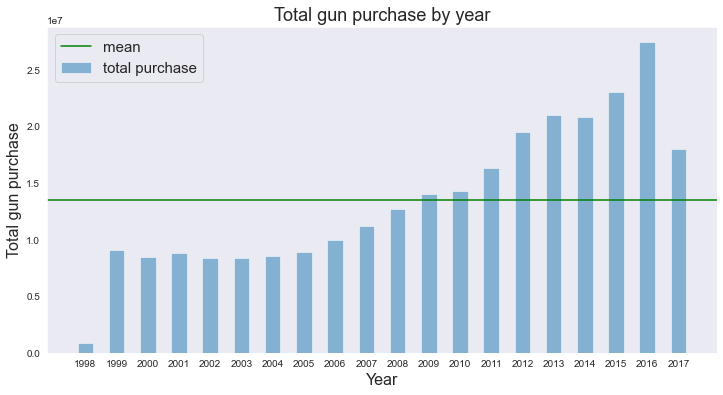

In [20]:
# Create a dataframe of two columns: year and total gun purchase group by year

totals_per_year=gun_df[['year','totals']].groupby('year').sum()

# mean of totals gun purchase by year
mean=totals_per_year.mean()

# Plot total gun purchase by year
x=list(totals_per_year.index)
y=totals_per_year['totals']

fig, ax=plt.subplots(figsize=(12,6))

ax.axhline(y=mean.item(), label='mean', color='green')

ax.bar(x, y, label='total purchase', width=0.5, align='center', alpha=0.5)

plt.xlabel('Year', fontsize=16)
plt.ylabel('Total gun purchase', fontsize=16)
plt.title('Total gun purchase by year', fontsize=18)
plt.legend(fontsize=15)

plt.show()

We observe from the graph that overall trend of total gun purchase has suddenly increased in 1999, then has been quite consistent from 1999 to 2005. from 2006 the overall trend has been increasing gradually up till 2016 that marks the maximum of the trend. in 2017 the trend has decreased significanty but still higher than the average. 

### Research Question 2 : Which states performed the highest growth in gun purchase?

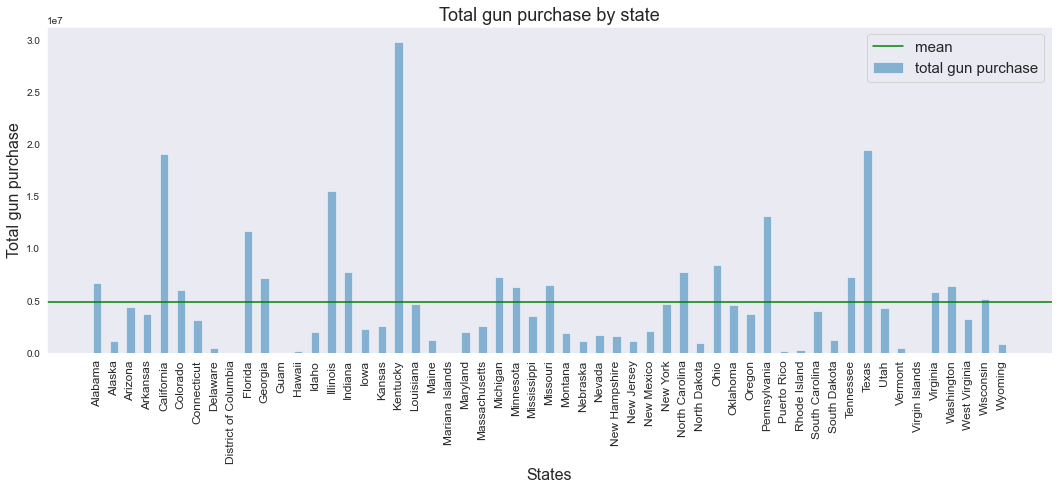

In [21]:
# Create a dataframe of two columns: state and total gun purchase group by state
totals_per_state=gun_df[['state','totals']].groupby('state').sum()

# mean of totals gun purchase by state
mean=totals_per_state.mean()

# Plot total gun purchase by state
x1=list(totals_per_state.index)
y1=list(totals_per_state['totals'])

fig, ax=plt.subplots(figsize=(18,6))

ax.axhline(y=mean.item(), label='mean', color='green')

ax.bar(x1, y1, label='total gun purchase', width=0.5, align='center', alpha=0.5)
plt.xticks(rotation='vertical', fontsize=12)

plt.xlabel('States', fontsize=16)
plt.ylabel('Total gun purchase', fontsize=16)
plt.title('Total gun purchase by state', fontsize=18)
plt.legend(fontsize=15)

plt.show()


In [22]:
# The states having performed the highest gun purchase
totals_per_state[totals_per_state['totals']>totals_per_state['totals'].mean()]

,totals
state,
Alabama,6706079
California,19014063
Colorado,6058482
Florida,11695777
Georgia,7209942
Illinois,15471534
Indiana,7737172
Kentucky,29762434
Michigan,7254279


We observe from the graph that the states that performed the highest growth in gun purchase are those having exceeded the mean. The state of Kentucky has performed the highest growth in gun purchase, followed by Texas, California, Illinois, Pennsylvania, Florida, as we can see in the result of the code above.

### Research Question 3: What correlation exists between Persons without health insurance, under age 65 years percent and Persons in poverty percent?

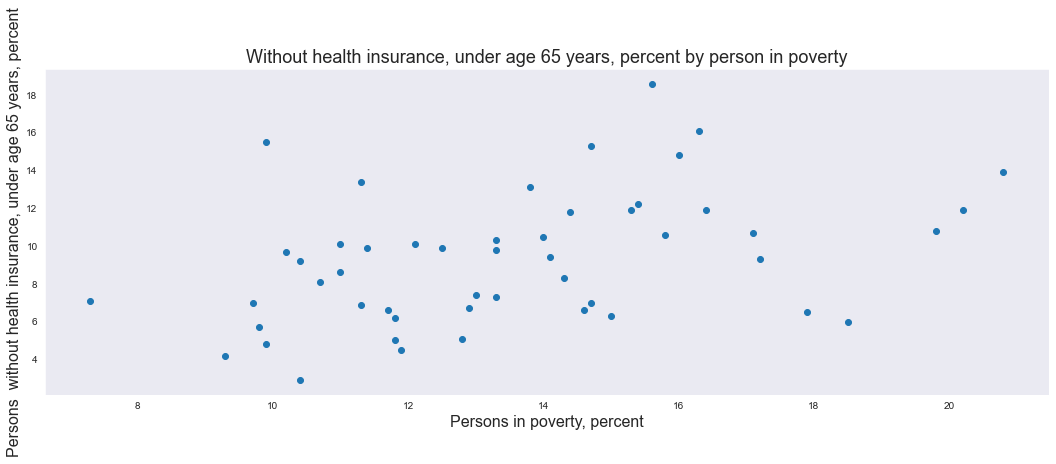

In [23]:
# Scatter plot the correlation between Persons without health insurance, under age 65 years percent and Persons in poverty percent.

x2=list(census_df['Persons in poverty, percent'])
y2=list(census_df['Persons  without health insurance, under age 65 years, percent'])
plt.figure(figsize=(18,6))
plt.scatter(x2,y2)
plt.xlabel('Persons in poverty, percent', fontsize=16)
plt.ylabel('Persons  without health insurance, under age 65 years, percent', fontsize=16)
plt.title('Without health insurance, under age 65 years, percent by person in poverty', fontsize=18)
plt.show()

In [24]:
np.corrcoef(x2,y2)

array([[1.        , 0.40440538],
       [0.40440538, 1.        ]])

We observe from the graph that the percentage of Persons  without health insurance, under age 65 years increases when the percentage of Persons in poverty increases. The correlation coefficient of 0.40 confirms that the two variables are moderately positively correlated.

### Research Question 4: What correlation exists between Bachelor's degree or higher, percent of persons age 25 years+, 2011-2015 and Persons in poverty, percent?

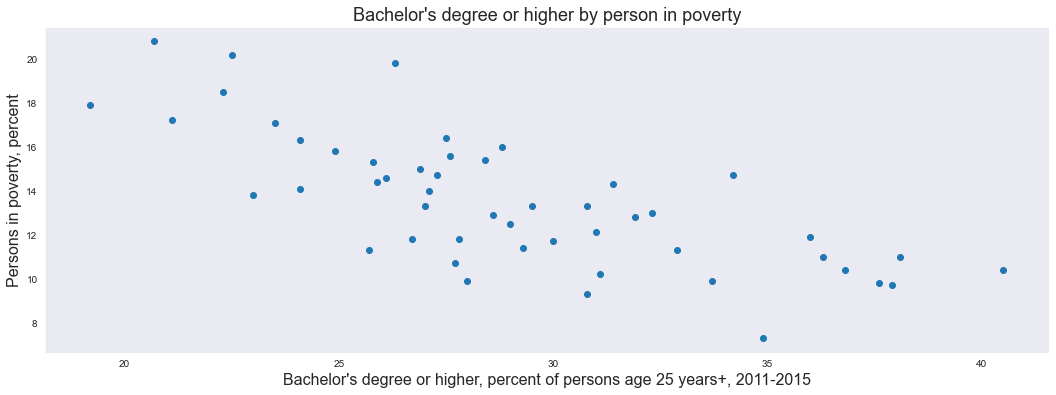

In [25]:
# Scatter plot the correlation between Bachelor's degree or higher, percent of persons age 25 years+, 2011-2015 and Persons in poverty, percent 

x3=list(census_df["Bachelor's degree or higher, percent of persons age 25 years+, 2011-2015"])
y3=list(census_df['Persons in poverty, percent'])
plt.figure(figsize=(18,6))
plt.scatter(x3,y3)
plt.xlabel("Bachelor's degree or higher, percent of persons age 25 years+, 2011-2015", fontsize=16)
plt.ylabel('Persons in poverty, percent', fontsize=16)
plt.title("Bachelor's degree or higher by person in poverty", fontsize=18)
plt.show()

In [26]:
np.corrcoef(x3,y3)

array([[ 1.        , -0.73398363],
       [-0.73398363,  1.        ]])

We observe from the graph that the percentage of Persons in poverty decreases when the percentage of Bachelor's degree or higher increases. The negative correlation coefficient of -0.73 confirms that the two variables are strongly negatively correlated.

### Question 5: What correlation exists between Veterans, 2011-2015 and totals gun purchase by state 2015?

In [27]:
# Extract from gun_df where year equal 2015
gun_df_2015=gun_df[gun_df['year']=='2015']
gun_df_2015=gun_df_2015.groupby(['state'])['totals'].sum()

# Remove 'District of Columbia','Guam','Puerto Rico','Mariana Islands','Virgin Islands' from gun_df_2016 to match the number of states with number of states in census_df.
gun_df_2015=gun_df_2015.drop(['District of Columbia','Guam','Puerto Rico','Mariana Islands','Virgin Islands'])

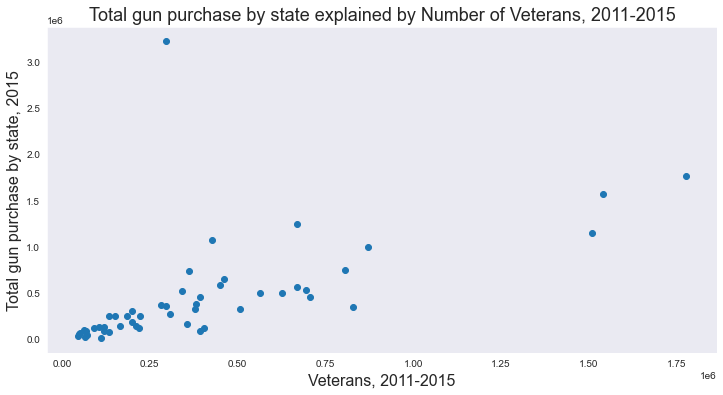

In [28]:
# Scatter plot the correlation between Veterans, 2011-2015 and totals gun purchase by state

x4=list(census_df['Veterans, 2011-2015'])
y4=list(gun_df_2015)

plt.figure(figsize=(12,6))
plt.scatter(x4,y4)

plt.xlabel("Veterans, 2011-2015", fontsize=16)
plt.ylabel('Total gun purchase by state, 2015', fontsize=16)
plt.title("Total gun purchase by state explained by Number of Veterans, 2011-2015", fontsize=18)
plt.show()

In [29]:
np.corrcoef(x4,y4)

array([[1.        , 0.59188997],
       [0.59188997, 1.        ]])

We observe from the graph that the Total gun purchase by state, 2016 increases when the number of Veterans, 2011-2015 increases. The correlation coefficient of 0.59 confirms that the two variables are strongly positively correlated.

### Question 6: What correlation exists between Veteran-owned firms, 2012 and totals gun purchase by state 2012?

In [30]:
# Extract from gun_df where year equal 2012
gun_df_2012=gun_df[gun_df['year']=='2012']
gun_df_2012=gun_df_2012.groupby(['state'])['totals'].sum()

# Remove 'District of Columbia','Guam','Puerto Rico','Mariana Islands','Virgin Islands' from gun_df_2016 to match the number of states with number of states in census_df.
gun_df_2012=gun_df_2012.drop(['District of Columbia','Guam','Puerto Rico','Mariana Islands','Virgin Islands'])

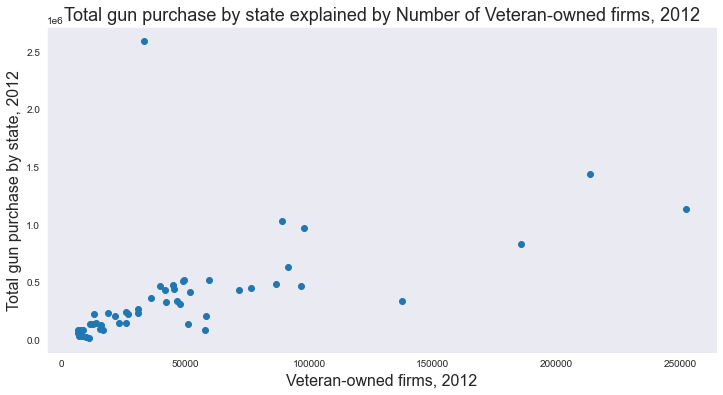

In [31]:
# Scatter plot the correlation between Veteran-owned firms, 2012 and totals gun purchase by state 2012

x5=list(census_df['Veteran-owned firms, 2012'])
y5=list(gun_df_2012)
plt.figure(figsize=(12,6))
plt.scatter(x5,y5)
plt.xlabel("Veteran-owned firms, 2012", fontsize=16)
plt.ylabel('Total gun purchase by state, 2012', fontsize=16)
plt.title("Total gun purchase by state explained by Number of Veteran-owned firms, 2012", fontsize=18)
plt.show()

In [32]:
np.corrcoef(x5,y5)

array([[1.        , 0.55379688],
       [0.55379688, 1.        ]])

We observe from the graph that the Total gun purchase by state in 2012 increases when the number of Veteran-owned firms in 2012 increases. The correlation coefficient of 0.55 confirms that the two variables are strongly positively correlated.

### Question 7: What correlation exists between All firms, 2012 and totals gun purchase by state 2012?

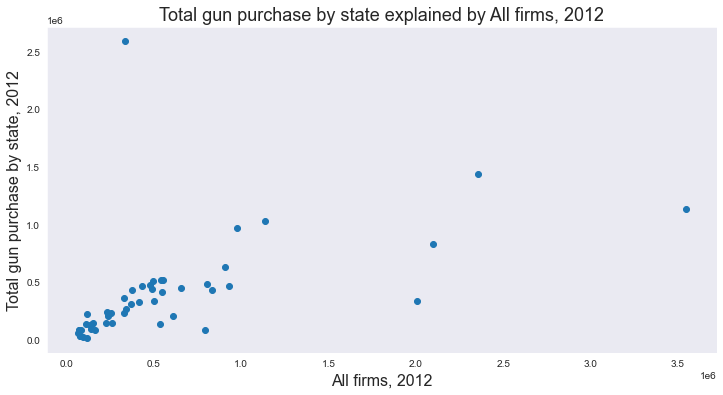

In [33]:
# Scatter plot the correlation between All firms, 2012 and totals gun purchase by state 2012

x6=list(census_df['All firms, 2012'])
plt.figure(figsize=(12,6))

plt.scatter(x6,y5)
plt.xlabel("All firms, 2012", fontsize=16)
plt.ylabel('Total gun purchase by state, 2012', fontsize=16)
plt.title("Total gun purchase by state explained by All firms, 2012", fontsize=18)
plt.show()

In [34]:
np.corrcoef(x6,y5)

array([[1.        , 0.51494967],
       [0.51494967, 1.        ]])

We observe from the graph that the Total gun purchase by state in 2012 increases when the number of All firms, 2012 increases. The correlation coefficient of 0.51 confirms that the two variables are strongly positively correlated.

### Question 8: What correlation exists between Total employment, 2015 and totals gun purchase by state, 2015?

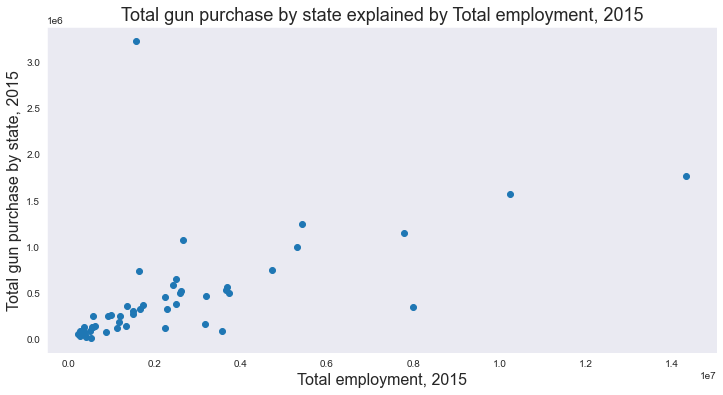

In [35]:
# Scatter plot the correlation between Total employment, 2015 and totals gun purchase by state 2015

x7=list(census_df['Total employment, 2015'])
plt.figure(figsize=(12,6))

plt.scatter(x7,y4)
plt.xlabel("Total employment, 2015", fontsize=16)
plt.ylabel('Total gun purchase by state, 2015', fontsize=16)
plt.title("Total gun purchase by state explained by Total employment, 2015", fontsize=18)
plt.show()

In [36]:
np.corrcoef(x7,y4)

array([[1.        , 0.56501631],
       [0.56501631, 1.        ]])

We observe from the graph that the Total gun purchase by state in 2015 increases when the number of Total employment, 2015 increases. The correlation coefficient of 0.56 confirms that the two variables are positively strongly correlated.

<a id='conclusions'></a>
## Conclusions

> **For question 1**: 
The overall trend of total gun purchase has suddenly increased in 1999, then has been quite consistent from 1999 to 2005. from 2006 the overall trend has been increasing gradually up till 2016 that marks the maximum of the trend. in 2017 the trend has decreased significanty but still higher than the average.


> **For question 2**:The state of Kentucky has performed the highest growth in gun purchase, followed by Texas, California, Illinois, Pennsylvania, Florida, Ohio, Indiana, Georgia, tennessee, North carolina, Alabama, Michigan, Missouri, Minnesota, Washington, Colorado, Virginia, Wisconsin.

> **For question 3**: The percentage of Persons  without health insurance, under age 65 years increases when the percentage of Persons in poverty increases. The correlation coefficient of 0.40 confirms that the two variables are midly positively correlated.
>>**limitation**: Here, percentage of Persons  without health insurance, under age 65 years and the percentage of Persons in poverty are not accurately stated. We don't know exactly which year they refer to.

> **For question 4**:The percentage of Persons in poverty decreases when the percentage of Bachelor's degree or higher, of persons age 25 years+, 2011-2015 increases. The negative correlation coefficient of -0.73 confirms that the two variables are strongtly negatively correlated.
>>**limitation**:  Here, percentage of Bachelor's degree or higher, of persons age 25 years+, 2011-2015 and percentage of Persons in poverty are not accurate stated. We don't exactly know which year they refer to.

> **For question 5**:The Total gun purchase by state, 2015, increases when the number of Veterans, 2011-2015 increases. The correlation coefficient of 0.59 confirms that the two variables are strongly positively correlated.
>>**limitation**:  Here the number of Veterans, 2011-2015 refers to the period from 2011-2015 whereas The Total gun purchase by state refers only to year 2015.

> **For question 6**:The Total gun purchase by state in 2012 increases when the number of Veteran-owned firms in 2012 increases. The correlation coefficient of 0.55 confirms that the two variables are strongly positively correlated.

>**For question 7**:The Total gun purchase by state in 2012 increases when the number of All firms, 2012 increases. The correlation coefficient of 0.51 confirms that the two variables are strongly positively correlated.

>**For question 8**:The Total gun purchase by state in 2012 increases when the number of All firms, 2012 increases. The correlation coefficient of 0.51 confirms that the two variables are strongly positively correlated.



In [37]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0